In [1]:
from google.colab import files
uploaded = files.upload()

Saving german_credit_data.csv to german_credit_data.csv


In [2]:
# =========================================
# CREDIT RISK ANALYTICS PROJECT (COLAB)
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import joblib

sns.set(style="whitegrid")

# =============================
# LOAD DATA
# =============================
df = pd.read_csv("german_credit_data.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1000, 10)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

df["Saving accounts"].fillna("no_info", inplace=True)
df["Checking account"].fillna("no_info", inplace=True)

/tmp/ipython-input-1538572728.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Saving accounts"].fillna("no_info", inplace=True)
/tmp/ipython-input-1538572728.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [4]:
df["Risk"] = ((df["Credit amount"] > 5000) &
              (df["Duration"] > 24)).astype(int)

df["Risk"].value_counts()

,count
Risk,
0,876
1,124


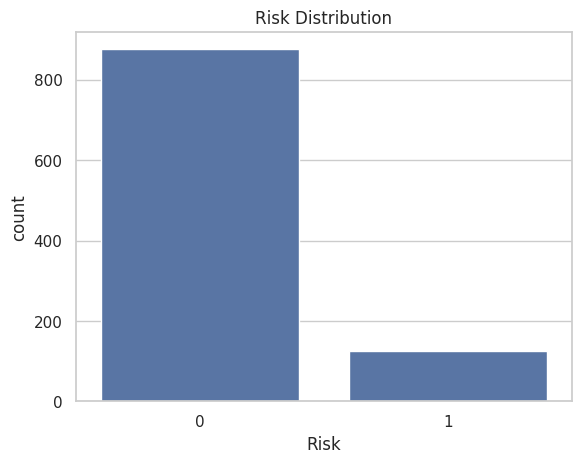

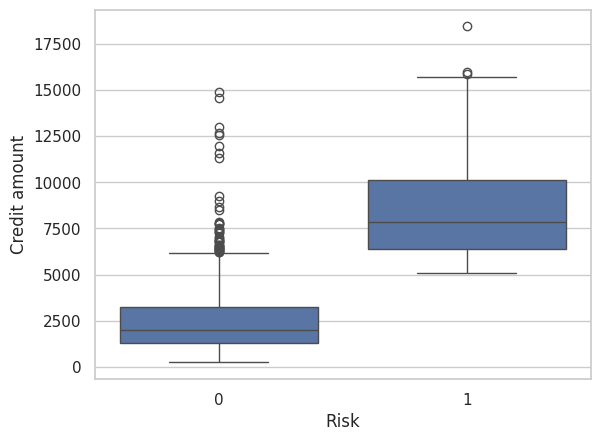

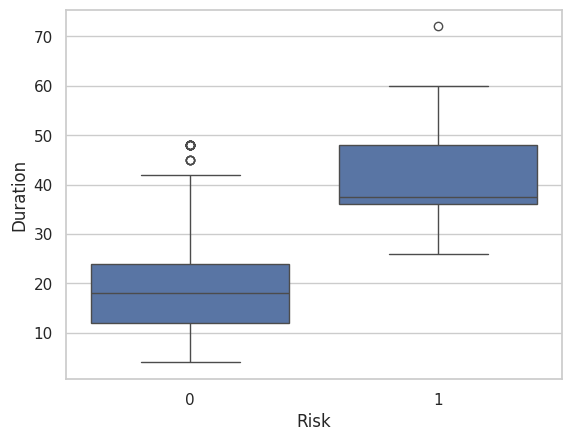

In [5]:
plt.figure()
sns.countplot(x="Risk", data=df)
plt.title("Risk Distribution")
plt.show()

plt.figure()
sns.boxplot(x="Risk", y="Credit amount", data=df)
plt.show()

plt.figure()
sns.boxplot(x="Risk", y="Duration", data=df)
plt.show()

In [6]:
X = df.drop("Risk", axis=1)
y = df["Risk"]

X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       176
           1       0.95      0.75      0.84        24

    accuracy                           0.96       200
   macro avg       0.96      0.87      0.91       200
weighted avg       0.96      0.96      0.96       200



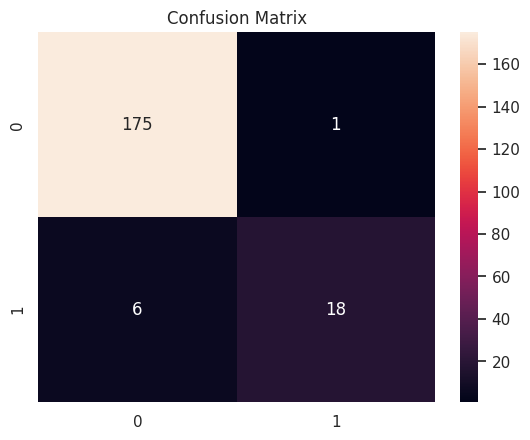

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

ROC AUC: 0.9888731060606061


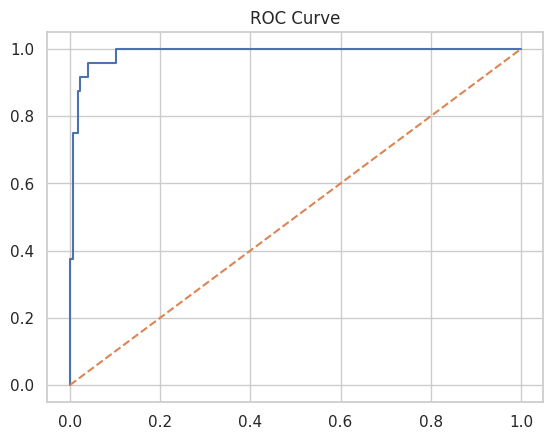

In [16]:
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.show()

In [17]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coeff.head(10)

,Feature,Coefficient
2,Credit amount,2.516091
3,Duration,2.276242
5,Housing_own,0.722031
6,Housing_rent,0.479037
0,Age,0.265377
1,Job,0.231406
16,Purpose_education,0.227766
4,Sex_male,0.220289
19,Purpose_repairs,0.123454
7,Saving accounts_moderate,0.115992


In [18]:
joblib.dump(model, "pd_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model saved in Colab")

Model saved in Colab


In [19]:
df_encoded = pd.get_dummies(df.drop("Risk", axis=1), drop_first=True)
df_encoded = df_encoded.reindex(columns=X.columns, fill_value=0)

df["PD"] = model.predict_proba(
    scaler.transform(df_encoded)
)[:,1]

df[["Age","Credit amount","Duration","PD"]].head()

,Age,Credit amount,Duration,PD
0,67,1169,6,0.000048
1,22,5951,48,0.595375
2,49,2096,12,0.001274
3,45,7882,42,0.875565
4,53,4870,24,0.013874


In [20]:
files.download("pd_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>